**Кластеризация** позволяет разбить объекты на группы, которые называются кластерами.

![alt](https://lms.skillfactory.ru/assets/courseware/v1/71ed6695ea8ac1cb291898658a7a9e98/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml1-4_3.png)

Центроид — это центр масс кластера, или среднее значение координат объектов кластера.

![alt](https://lms.skillfactory.ru/assets/courseware/v1/d12a718367e0550f78ed02f2d4a312dd/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-2_1.png)

### <center> АЛГОРИТМ K-MEANS

Идея алгоритма состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

Но как реализовать это в алгоритме? Алгоритм k-means состоит из **девяти шагов**. Давайте подробно рассмотрим каждый из [них](https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DSPR-2.0+14JULY2021/courseware/10251366278a4ae3b17c3d9b44033983/2510b3d364354e128736a64b3a9bfdb5/?child=first)


Что необходимо для запуска?

Обязательно задать количество кластеров, на которые необходимо разделить данные.

Данные, т. е. параметры объектов ($x_i$), которые мы будем передавать в виде матрицы наблюдений X.

После этого можно запустить алгоритм и для каждого объекта в данных получить метку, к какому кластеру этот объект относится:

In [1]:


# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = df[["x1", "x2", "x3"]]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

NameError: name 'df' is not defined

Таким образом, мы обучили модель кластеризации. Если нужно определить, к какому из существующих кластеров будут отнесены новые данные из df2, то мы просто воспользуемся методом predict:

In [ ]:
X_new = df2[["x1", "x2", "x3"]]
k_means.predict(X_new)

Чтобы запустить алгоритм, необходимо задать параметры кластеризации:

n_clusters — количество кластеров. По умолчанию — 8.

init — способ инициализации центроидов. Есть две опции: random (выбирает центроиды случайным образом) и k-means++ (более «хитрый» алгоритм, который позволяет модели быстрее сходиться). По умолчанию используется k-means++.

n_init — количество случайных инициализаций алгоритма k-means. В конце будут выбраны те результаты, которые имеют наилучшие значения критерия k-means. По умолчанию n_init = 10.

max_iter — максимальное количество итераций алгоритма k-means при одном запуске. По умолчанию — 300.

random_state — параметр, который определяет генерацию случайных чисел для инициализации центроида. Чтобы детерминировать случайность, нужно задать какое-нибудь число.

Далее в ноутбуке pokemon

### <center> ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО K ДЛЯ АЛГОРИТМА K-MEANS

 Для этого можно использовать несколько способов: **метод локтя** (elbow plot), **статистику разрыва** (Gap Statistic Method), **коэффициент силуэта** (Average Silhouette Method). Мы рассмотрим метод локтя и коэффициент силуэта.

Начнём с метода локтя.

Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется недообученной (underfitting).

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется переобученной (overfitting).

Чтобы определить оптимальное количество кластеров, используя метод локтя, необходимо нарисовать график, на котором по оси x будет отложено количество кластеров, а по оси y — инерция.

Инерция — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.

![alt](https://lms.skillfactory.ru/assets/courseware/v1/bbc9751013a95517736c8ad4c118ac7b/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-2_19.png)

Если вдруг в ходе работы вы встречаете график, на котором невозможно найти «локоть», на помощь придёт **коэффициент силуэта.**

График силуэта, в отличие от графика локтя, имеет пиковый характер, поэтому его проще визуализировать и анализировать.

На графике ниже по оси x отложено количество кластеров, а по оси y — значение коэффициента силуэта. Можно отчётливо увидеть, что пик графика приходится на количество кластеров, равное 3:

![alt](https://lms.skillfactory.ru/assets/courseware/v1/f2d8a5a95d784aeb8ea10c39e4badbb2/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-2_34.png)

**Коэффициент силуэта** показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров.

Если силуэт равен 1, это означает, что кластеры хорошо разделены между собой и имеют высокую плотность внутри себя, например, такая кластеризация, где данные чётко разделены на три группы:

![alt](https://lms.skillfactory.ru/assets/courseware/v1/7959f5f575571f684136123b96e33a4a/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-2_22.png)

In [3]:
import numpy as np
import pandas as pd 

data = pd.read_csv('data/values_from_the_instrument.csv')
data

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278
...,...,...
995,64.147007,59.058766
996,48.973928,67.454876
997,62.605739,58.633415
998,47.122895,67.308920


Задание 2.7

Вам как специалисту по анализу данных поступили показания с прибора, измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.

In [4]:
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

<AxesSubplot:>

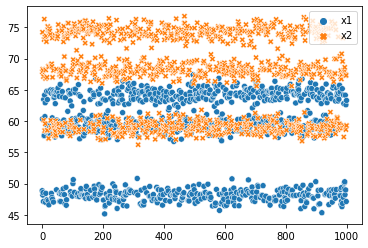

In [5]:
sns.scatterplot(data=data)

In [6]:
# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
X = data
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

<AxesSubplot:xlabel='cluster', ylabel='silhouette'>

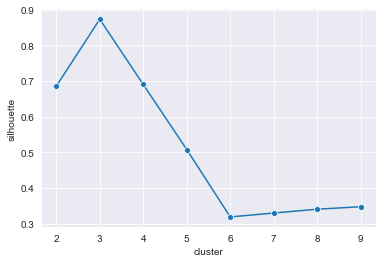

In [9]:
# импортируем метрику силуэт
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = data

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")